In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
combined_data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [7]:
customer_data = combined_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    average_spent=('TotalValue', 'mean')
).reset_index()


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spent', 'transaction_count', 'average_spent']])


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)  # You can change the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)


f:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


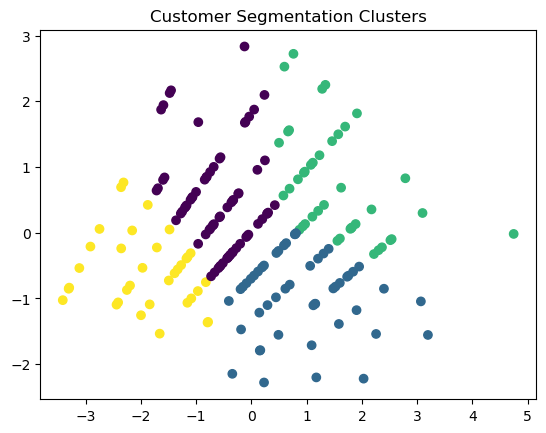

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_data_scaled)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()


In [12]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f"DB Index: {db_index}")


DB Index: 1.063271939884462
